<a href="https://colab.research.google.com/github/githinjimary/DSI.2022/blob/main/Module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install dlib

In [3]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=7fe14caf114ae6db906510233ca9bc31207e87fce295902f7b1f50a855c95e7b
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [7]:
#importing libraries
import cv2
import numpy as np
import face_recognition
from google.colab.patches import cv2_imshow

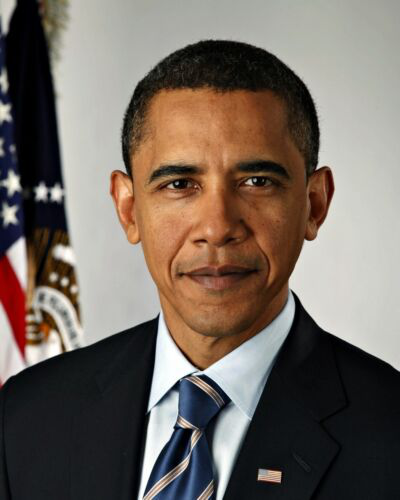

-1

In [12]:
#load an image
obamaimg = face_recognition.load_image_file('/content/drive/MyDrive/capstone_project/obama.jpg')
obama = cv2.cvtColor(obamaimg,cv2.COLOR_BGR2RGB)
cv2_imshow(obama)
cv2.waitKey(0)

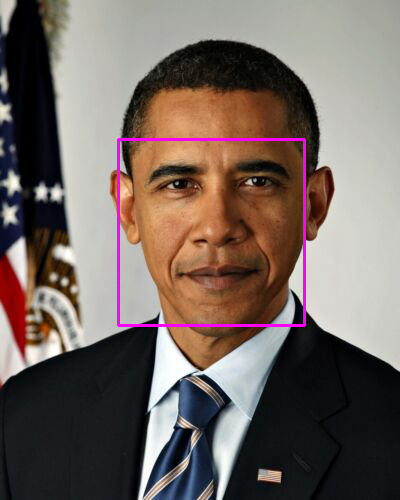

-1

In [16]:
obamaimg = face_recognition.load_image_file('/content/drive/MyDrive/capstone_project/obama.jpg')
obama = cv2.cvtColor(obamaimg,cv2.COLOR_BGR2RGB)
#Finding face Location for drawing bounding boxes-------
face = face_recognition.face_locations(obama)[0]
copy = obama.copy()
#-Drawing the Rectangle
cv2.rectangle(copy, (face[3], face[0]),(face[1], face[2]), (255,0,255), 2)
cv2_imshow(copy)
cv2.waitKey(0)

In [17]:
#training 
train_OBAMA_encodings = face_recognition.face_encodings(obama)[0]

In [19]:
# test an image
test = face_recognition.load_image_file('/content/drive/MyDrive/capstone_project/obama1A.webp')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
test_encode = face_recognition.face_encodings(test)[0]
print(face_recognition.compare_faces([train_OBAMA_encodings],test_encode))

[True]


In [20]:
#test an older image
test2 = face_recognition.load_image_file('/content/drive/MyDrive/capstone_project/Obama1B.webp')
test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2RGB)
test2_encode = face_recognition.face_encodings(test2)[0]
print(face_recognition.compare_faces([train_OBAMA_encodings],test2_encode))

[True]


In [21]:
# test an image of trump
test3 = face_recognition.load_image_file('/content/drive/MyDrive/capstone_project/trump.jpg')
test3 = cv2.cvtColor(test3, cv2.COLOR_BGR2RGB)
test3_encode = face_recognition.face_encodings(test3)[0]
print(face_recognition.compare_faces([train_OBAMA_encodings],test3_encode))


[False]


**Building a Face Recognition System**

In [22]:
#importing libraries. 
import cv2
import face_recognition
import os
import numpy as np
from datetime import datetime
import pickle

In [23]:
path = '/content/drive/MyDrive/capstone_project/student_images'

In [26]:
#create a list to store person_name and image array
images = []
classNames = []
mylist = os.listdir(path)
for cl in mylist:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])

In [27]:
#create a function to encode all the train images and store them in a variable encoded_face_train.
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encoded_face = face_recognition.face_encodings(img)[0]
        encodeList.append(encoded_face)
    return encodeList
encoded_face_train = findEncodings(images)

In [28]:
os.chdir('/content/drive/MyDrive/capstone_project')

In [41]:
#Creat a function that will create a Attendance.csv file to store the attendance with time
def markAttendance(name):
    with open('/content/drive/MyDrive/capstone_project/Attendance.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()


In [45]:
# take pictures from webcam 
cap  = cv2.VideoCapture(0)
while True:
    success, img = cap.read()
    imgS = cv2.resize(img, (0,0), None, 0.25,0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
    faces_in_frame = face_recognition.face_locations(imgS)
    encoded_faces = face_recognition.face_encodings(imgS, faces_in_frame)
    for encode_face, faceloc in zip(encoded_faces,faces_in_frame):
        matches = face_recognition.compare_faces(encoded_face_train, encode_face)
        faceDist = face_recognition.face_distance(encoded_face_train, encode_face)
        matchIndex = np.argmin(faceDist)
        print(matchIndex)
        if matches[matchIndex]:
            name = classNames[matchIndex].upper().lower()
            y1,x2,y2,x1 = faceloc
            # since we scaled down by 4 times
            y1, x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img, (x1,y2-35),(x2,y2), (0,255,0), cv2.FILLED)
            cv2.putText(img,name, (x1+6,y2-5), cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            markAttendance(name)
    cv2.imshow('webcam', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

error: ignored